# Applied Data Science Specialization Capstone

This notebook shows the process for completing the capstone project for the Applied Data Science Specialization Capstone course issued by Coursera in conjunction with IBM.

https://www.coursera.org/professional-certificates/ibm-data-science

In this assignment, the student must leverage location data using Foursquare API to solve a problem or get deeper insights into a neighborhood's reputation. 

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn



!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas import json_normalize

! pip install folium==0.5.0
import folium # plotting library

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs


print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 112kB 8.0MB/s eta 0:00:01
Folium installed
Libraries imported.


In [3]:
pizza_all = pd.read_csv('8358_1.csv')
pizza_all.head()

,id,address,categories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,...,menus.currency,menus.dateSeen,menus.description,menus.name,name,postalCode,priceRangeCurrency,priceRangeMin,priceRangeMax,province
0,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,22.50,...,USD,2016-03-31T02:19:42Z,NaN,Bianca Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
1,AVwc_6KEIN2L1WUfrKAH,Cascade Village Mall Across From Target,Pizza Place,Bend,US,us/or/bend/cascadevillagemallacrossfromtarget/...,44.102665,-121.300797,NaN,18.95,...,USD,2016-03-31T02:19:42Z,NaN,Cheese Pizza,Little Pizza Paradise,97701,NaN,NaN,NaN,OR
2,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,12.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Margherita",The Brentwood,90049,USD,50.0,55.0,Brentwood
3,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,NaN,"Pizza, Mushroom",The Brentwood,90049,USD,50.0,55.0,Brentwood
4,AVwc_6qRByjofQCxkcxw,148 S Barrington Ave,"American Restaurant,Bar,Bakery",Los Angeles,US,us/brentwood/losangeles/148sbarringtonave/-151...,34.064563,-118.469017,NaN,13.00,...,USD,2015-10-23T03:57:26Z,"Olives, onions, capers, tomatoes","Pizza, Puttenesca",The Brentwood,90049,USD,50.0,55.0,Brentwood


In [4]:
pizza_all = pizza_all.drop(['keys','menuPageURL','country','menus.amountMax','menus.currency','menus.dateSeen','priceRangeCurrency','menus.amountMin','address','id','menus.description','priceRangeMin','priceRangeMax','province', 'categories', 'postalCode'], axis=1)

pizza_all.rename(columns = {'menus.name': 'Pizza', 'name': 'Restaurant'}, inplace = True)


pizza_all.head()

,city,latitude,longitude,Pizza,Restaurant
0,Bend,44.102665,-121.300797,Bianca Pizza,Little Pizza Paradise
1,Bend,44.102665,-121.300797,Cheese Pizza,Little Pizza Paradise
2,Los Angeles,34.064563,-118.469017,"Pizza, Margherita",The Brentwood
3,Los Angeles,34.064563,-118.469017,"Pizza, Mushroom",The Brentwood
4,Los Angeles,34.064563,-118.469017,"Pizza, Puttenesca",The Brentwood


In [7]:
pizza_all.to_csv('pizza_refined.csv',index=False)

In [5]:
pd.value_counts(pizza_all['Restaurant'])

Sicilia's Pizzeria                                 96
J & G Restaurant                                   55
Casey's General Store                              43
The Pizza Joint                                    36
North End Pizzeria                                 34
                                                   ..
Rick's Cabaret                                      1
Brio Tuscan Grille - Cherokee - Cherokee Casino     1
Yesterday's Food Spirits                            1
Mighty Mick's Pub & Cafe                            1
Harvey's Bistro Park Ave @ Metro West               1
Name: Restaurant, Length: 933, dtype: int64

In [6]:
counts = pd.DataFrame(pd.value_counts(pizza_all['Pizza']))


counts.head(20)

,Pizza
Cheese Pizza,136
White Pizza,75
Margherita Pizza,63
Pizza,62
Hawaiian Pizza,54
Pizza Burger,50
Bbq Chicken Pizza,47
Pepperoni Pizza,44
Buffalo Chicken Pizza,44
Veggie Pizza,34


In [7]:
counts.tail(10)

,Pizza
Chalet Vegetarian Pizza,1
Funghi Pizza,1
Stuffed Pizza Rollers,1
Pizza Steak Platter,1
New York Strip Pizzaiola,1
Fruit Pizza,1
Sweet Fennel Sausage Pizza,1
Veggie Pizza (medium 16 Pieces),1
Ultimate Buffalo Chicken Pizza,1
Pizza Prosciutto Con Arugula Combination,1


In [8]:
!pip install wordcloud

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

     |████████████████████████████████| 368kB 8.9MB/s eta 0:00:01


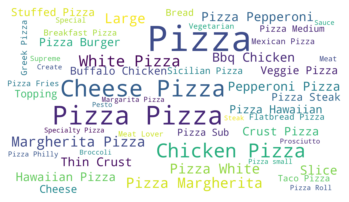

In [10]:
pizza_all['Pizza'] = pizza_all['Pizza'].astype('string')

text = pizza_all['Pizza']

# Create and generate a word cloud image:
wordcloud = WordCloud(max_font_size=200, max_words=50, background_color="white", width=1920, height=1080).generate(' '.join(text))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
pizza_rf = pd.read_csv('pizza_final.csv')

#pizza_rf = pizza_all

pizza_rf.rename(columns = {'menus.name': 'Pizza', 'name': 'Restaurant'}, inplace = True)

pizza_rf.head()

,city,latitude,longitude,Pizza,Restaurant,postalCode
0,Bend,44.102665,-121.300797,Bianca Pizza,Little Pizza Paradise,97701
1,Bend,44.102665,-121.300797,Cheese Pizza,Little Pizza Paradise,97701
2,Los Angeles,34.064563,-118.469017,Margherita Pizza,The Brentwood,90049
3,Los Angeles,34.064563,-118.469017,Mushroom Pizza,The Brentwood,90049
4,Los Angeles,34.064563,-118.469017,"Pizza, Puttenesca",The Brentwood,90049


In [12]:
counts = pd.DataFrame(pd.value_counts(pizza_rf['Pizza']))

counts.head()

,Pizza
Cheese Pizza,288
Chicken Pizza,152
Margherita Pizza,143
Veggie Pizza,141
White Pizza,136


In [13]:
pizza_gd = pd.get_dummies(pizza_rf, columns=['Pizza'], prefix='', prefix_sep='')

pizza_ingredients = pizza_gd.drop(['latitude','longitude','city','postalCode'], axis=1)

pizza_ingredients

,Restaurant,1 Ingredient Pizza,1 Item Pizza,1 Pizza With The Works,100 Pound Pizza,12 Sweep The Kitchen Pizza,14 Party Pizza,14 Sweep The Kitchen Pizza,15 Pizza Mafia,2 Item Pizza,...,Wild Ranch Pizza,Winter Pizza,Wood Fire Grilled Pizza,Wood Oven Pizza,Works Pizza,Yiayias Pizza,Zbq Pizza,Zesty Garlic Wing Pizza,Zesty Italian Pizza,Zingers Pizza
0,Little Pizza Paradise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Little Pizza Paradise,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Brentwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Brentwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,The Brentwood,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3505,Prison Brews Brewery & Restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3506,Prison Brews Brewery & Restaurant,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3507,Moonlight Cafe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3508,Moonlight Cafe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
pizza_ingredients_gb = pizza_ingredients.groupby('Restaurant').sum()

pizza_ingredients_gb.head()

#pizza_ingredients_gb.to_csv("pivot_pizza_types.csv", index=True)

,1 Ingredient Pizza,1 Item Pizza,1 Pizza With The Works,100 Pound Pizza,12 Sweep The Kitchen Pizza,14 Party Pizza,14 Sweep The Kitchen Pizza,15 Pizza Mafia,2 Item Pizza,2 Items Pizza,...,Wild Ranch Pizza,Winter Pizza,Wood Fire Grilled Pizza,Wood Oven Pizza,Works Pizza,Yiayias Pizza,Zbq Pizza,Zesty Garlic Wing Pizza,Zesty Italian Pizza,Zingers Pizza
Restaurant,,,,,,,,,,,,,,,,,,,,,
'l Bistro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24 Hour Express Locksmith Inc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7 Day 24 Hours Emergency Locks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abo's Pizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abyssinia Chinese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
list_100 = list(range(2, 300))

pizza_ingredients_gb = pizza_ingredients_gb.replace(list_100, 1)

pizza_ingredients_gb.to_csv("pivot_pizza_max_one2.csv", index=True)

pizza_ingredients_gb.head(20)

,1 Ingredient Pizza,1 Item Pizza,1 Pizza With The Works,100 Pound Pizza,12 Sweep The Kitchen Pizza,14 Party Pizza,14 Sweep The Kitchen Pizza,15 Pizza Mafia,2 Item Pizza,2 Items Pizza,...,Wild Ranch Pizza,Winter Pizza,Wood Fire Grilled Pizza,Wood Oven Pizza,Works Pizza,Yiayias Pizza,Zbq Pizza,Zesty Garlic Wing Pizza,Zesty Italian Pizza,Zingers Pizza
Restaurant,,,,,,,,,,,,,,,,,,,,,
'l Bistro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24 Hour Express Locksmith Inc,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7 Day 24 Hours Emergency Locks,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abo's Pizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abyssinia Chinese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acapulco Mexican Restaurant,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ace's Pizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adriatico Pizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aj's Pizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
pizza_ingredients_gb.drop([col for col, val in pizza_ingredients_gb.sum().iteritems() if val < 25], axis=1, inplace=True)

pizza_ingredients_gb.drop([col for col, val in pizza_ingredients_gb.sum().iteritems() if val > 80], axis=1, inplace=True)

pizza_ingredients_gb.head(20)

,Bbq Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,Flat Bread Pizza,Greek Pizza,Hawaiian Pizza,Marinara Pizza,Meat Pizza,Mexican Pizza,...,Pizza Bread,Pizza Fries,Pizza Slice,Pizza Sub,Pizza Toppings,Sausage Pizza,Seafood Pizza,Steak Pizza,Taco Pizza,Traditional Pizza
Restaurant,,,,,,,,,,,,,,,,,,,,,
'l Bistro,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24 Hour Express Locksmith Inc,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
7 Day 24 Hours Emergency Locks,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Abo's Pizza,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
Abyssinia Chinese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Acapulco Mexican Restaurant,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Ace's Pizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adriatico Pizza,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
Aj's Pizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
pizza_ingredients_gb.loc["Total"] = pizza_ingredients_gb.sum()


pizza_ingredients_gb.loc[ 'Total' , : ]

Bbq Pizza               66
Buffalo Pizza           59
Build your own Pizza    44
Burger Pizza            66
Flat Bread Pizza        29
Greek Pizza             36
Hawaiian Pizza          62
Marinara Pizza          38
Meat Pizza              58
Mexican Pizza           28
Mushroom Pizza          25
Pepperoni Pizza         72
Pizza Bread             25
Pizza Fries             30
Pizza Slice             50
Pizza Sub               32
Pizza Toppings          40
Sausage Pizza           28
Seafood Pizza           42
Steak Pizza             77
Taco Pizza              34
Traditional Pizza       78
Name: Total, dtype: int64

In [18]:
pizza_ingredients_gb

,Bbq Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,Flat Bread Pizza,Greek Pizza,Hawaiian Pizza,Marinara Pizza,Meat Pizza,Mexican Pizza,...,Pizza Bread,Pizza Fries,Pizza Slice,Pizza Sub,Pizza Toppings,Sausage Pizza,Seafood Pizza,Steak Pizza,Taco Pizza,Traditional Pizza
Restaurant,,,,,,,,,,,,,,,,,,,,,
'l Bistro,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24 Hour Express Locksmith Inc,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
7 Day 24 Hours Emergency Locks,0,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Abo's Pizza,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
Abyssinia Chinese,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoës Kitchen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zo��s Kitchen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zpizza,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
pizza_with_less  = pizza_ingredients_gb

pizza_with_less['Total'] = pizza_with_less.sum(axis = 1)

pizza_with_less = pizza_with_less.sort_values(by='Total')

pizza_with_less

,Bbq Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,Flat Bread Pizza,Greek Pizza,Hawaiian Pizza,Marinara Pizza,Meat Pizza,Mexican Pizza,...,Pizza Fries,Pizza Slice,Pizza Sub,Pizza Toppings,Sausage Pizza,Seafood Pizza,Steak Pizza,Taco Pizza,Traditional Pizza,Total
Restaurant,,,,,,,,,,,,,,,,,,,,,
Enterprise Deli,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Roma Bistro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Gluten Free Creations,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Romio's Pizza & Pasta - Downtown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Rosa Mexicano,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Valentino Pizza I,1,1,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,7
Stone and Paddle,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,1,1,1,0,0,8
Original Giorgio's,1,1,0,1,0,1,0,0,0,0,...,1,1,1,0,0,1,1,0,0,9


In [20]:
pizza_with_less.loc[(pizza_with_less.Total == 0),'Total']= 100000

pizza_with_less.loc[(pizza_with_less.Total != 100000),'Total']= 0

pizza_with_less.loc[(pizza_with_less.Total == 100000),'Total']= 1

pizza_with_less = pizza_with_less.rename(columns = {'Total': 'Signature Pizza'})

pizza_with_less.drop("Total", axis=0, inplace=True)

pizza_with_less

,Bbq Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,Flat Bread Pizza,Greek Pizza,Hawaiian Pizza,Marinara Pizza,Meat Pizza,Mexican Pizza,...,Pizza Fries,Pizza Slice,Pizza Sub,Pizza Toppings,Sausage Pizza,Seafood Pizza,Steak Pizza,Taco Pizza,Traditional Pizza,Signature Pizza
Restaurant,,,,,,,,,,,,,,,,,,,,,
Enterprise Deli,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Roma Bistro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Gluten Free Creations,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Romio's Pizza & Pasta - Downtown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Rosa Mexicano,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pronto Pizza,0,0,0,0,0,0,1,1,1,0,...,0,1,0,0,1,0,0,0,0,0
Valentino Pizza I,1,1,0,1,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
Stone and Paddle,1,1,0,0,0,0,1,1,1,0,...,0,0,0,0,1,1,1,0,0,0


In [21]:
pizza_ingredients_gb = pizza_with_less

pizza_ingredients_gb.to_csv("pizza_ingredients_2.csv", index=True)

In [22]:
pizza_ingredients_gb.loc["Total"] = pizza_ingredients_gb.sum()


pizza_ingredients_gb.loc[ 'Total' , : ]

Bbq Pizza                66
Buffalo Pizza            59
Build your own Pizza     44
Burger Pizza             66
Flat Bread Pizza         29
Greek Pizza              36
Hawaiian Pizza           62
Marinara Pizza           38
Meat Pizza               58
Mexican Pizza            28
Mushroom Pizza           25
Pepperoni Pizza          72
Pizza Bread              25
Pizza Fries              30
Pizza Slice              50
Pizza Sub                32
Pizza Toppings           40
Sausage Pizza            28
Seafood Pizza            42
Steak Pizza              77
Taco Pizza               34
Traditional Pizza        78
Signature Pizza         366
Name: Total, dtype: int64

In [23]:
pizza_total = pd.DataFrame(pizza_ingredients_gb.loc[ 'Total' , : ])

pizza_total

pizza_total.index.name = 'Pizza type'

<AxesSubplot:ylabel='Pizza type'>

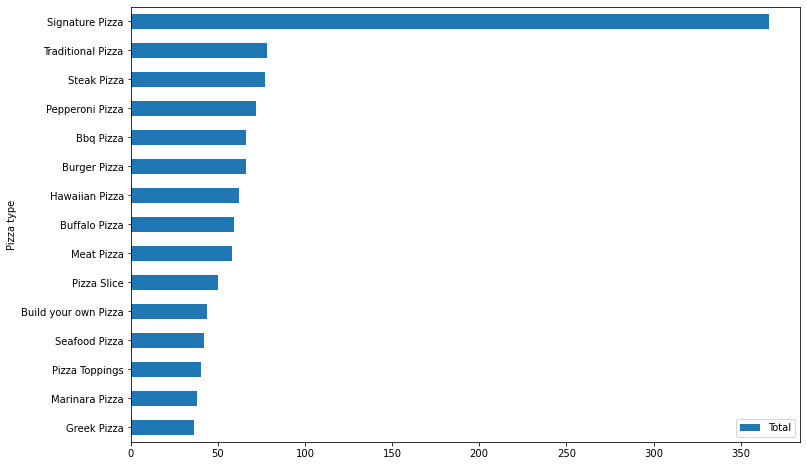

In [24]:
pizza_total.sort_values(by=['Total']).tail(15).plot.barh(y='Total', rot=0, figsize=(12,8))

<AxesSubplot:ylabel='Pizza type'>

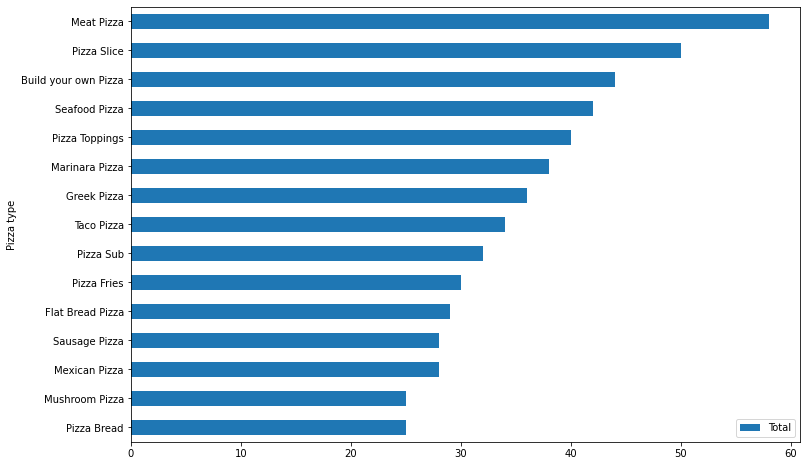

In [25]:
pizza_total.sort_values(by=['Total']).head(15).plot.barh(y='Total', rot=0, figsize=(12,8))

In [26]:
restaurant_data = pizza_rf.drop(['Pizza','postalCode'], axis=1)

restaurant_data = restaurant_data.groupby('Restaurant').mean()

restaurant_data

,latitude,longitude
Restaurant,,
'l Bistro,47.912502,-97.089808
24 Hour Express Locksmith Inc,39.967141,-75.176412
7 Day 24 Hours Emergency Locks,40.771072,-74.022650
Abo's Pizza,39.535558,-105.014900
Abyssinia Chinese,39.954990,-82.860610
...,...,...
Zone Action Park,26.193580,-98.251973
Zoës Kitchen,32.975947,-96.720418
Zo��s Kitchen,29.545871,-98.578713


In [27]:
# @hidden_cell

CLIENT_ID = '###' # Foursquare ID
CLIENT_SECRET = '###' # Foursquare Secret
VERSION = '20180604'
LIMIT = 100


In [28]:
import urllib.parse

def searchVenue(name, latitude, longitude):
    
    llacc = 1000000
    altacc = 1000000
    
    venues_list=[]
    for name, lat, lng in zip(name, latitude, longitude):
        print(name)
            
        url = "https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&query={}&limit={}&llAcc={}&altAcc={}".format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            urllib.parse.quote_plus(name), 
            LIMIT,
            llacc,
            altacc
        )
        
        results = requests.get(url).json()["response"]['venues']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['name'],
            str(v['id']),
            v['location']['lat'], 
            v['location']['lng'] ) for v in results])

    venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    venues.columns = ['Name', 
                  'Restaurant Latitude', 
                  'Restaurant Longitude', 
                  'Venue', 
                  'Venue Id', 
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(venues)

In [ ]:
pizza_venues_complete = searchVenue(name=restaurant_data.index,
                                   latitude=restaurant_data['latitude'],
                                   longitude=restaurant_data['longitude']
                                  )

pizza_venues_complete

In [29]:
#pizza_ingredients_gb.to_csv("pizza_with_id_final.csv", index=True)

In [30]:
pizza_venues_complete = pd.read_csv('pizza_with_id_final.csv')
pizza_venues_complete

,Name,Restaurant Latitude,Restaurant Longitude,Venue,Venue Id,Venue Latitude,Venue Longitude
0,'l Bistro,47.912502,-97.089808,'L Bistro,4b4decbbf964a52036db26e3,47.912378,-97.090652
1,24 Hour Express Locksmith Inc,39.967141,-75.176412,24 Hour Locksmith,54e7e3d4498e4071f750f7b8,40.054890,-75.055405
2,7 Day 24 Hours Emergency Locks,40.771072,-74.022650,24 Hr 7 Day Totowa Locksmith,539ea214498e9480b696151d,40.908466,-74.205574
3,Abo's Pizza,39.535558,-105.014900,Deli Zone/Abo's Pizza,4bb9f246935e9521d8862790,39.711718,-104.863115
4,Abyssinia Chinese,39.954990,-82.860610,Abyssinia Cafe,4b78bd74f964a5203ee02ee3,39.974560,-82.901367
...,...,...,...,...,...,...,...
864,Zimorino's Red Pies Over Montana,46.877681,-114.012118,Zimorino's Red Pies Over Montana Delivery,4f322b0619836c91c7bcdedb,46.873516,-113.992653
865,Zios Italian Kitchen - Olathe,38.908968,-94.768710,Zio's Italian Kitchen,4f3205c719833175d60a9b7c,38.897964,-94.743546
866,Zoës Kitchen,32.975947,-96.720418,Zoës Kitchen,5526a667498e628ff99f2e18,32.870444,-96.768850
867,Zo��s Kitchen,29.545871,-98.578713,Zoës Kitchen,513525f67ab480bf84a4046f,29.546346,-98.577478


In [31]:
import time

def getVenueDetails(names, venue_ids):
    
    venues_list=[]
    for name, venue_id in zip(names, venue_ids):
        print(name)
        
        url = "https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}".format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET,
            VERSION
        )
        print(url)
        
        v = requests.get(url).json()["response"]['venue']
      
        likes = v['likes']['count'] if 'likes' in v and 'count' in v['likes'] else 'NaN'
        price = v['price']['tier'] if 'price' in v and 'tier' in v['price'] else 'NaN'
        rating = v['rating'] if 'rating' in v else 'NaN'
        
        time.sleep(1)
        
        venues_list.append([
            name,
            venue_id,
            v['name'],
            likes,
            price, 
            rating])

    venues_with_details = pd.DataFrame(venues_list, columns = [
                  'Name', 
                  'id',
                  'Venue Name',
                  'likes', 
                  'price',
                  'rating']
                                    )
    
    return(venues_with_details)

In [ ]:
Venue_Names = pizza_venues_complete['Name']
Venue_Ids = pizza_venues_complete['Venue Id']

pizza_venues_details = getVenueDetails(names=Venue_Names,
                                   venue_ids=Venue_Ids
                                  )

#pizza_venues_details.to_csv("pizzeria_details_800_868.csv", index=True)

pizza_venues_details.head()


In [32]:
pizza_venues_details = pd.read_csv('pizzeria_details_complete.csv')
pizza_venues_details.head()

,Name,id,Venue Name,likes,price,rating
0,'l Bistro,4b4decbbf964a52036db26e3,'L Bistro,11,2.0,5.9
1,24 Hour Express Locksmith Inc,54e7e3d4498e4071f750f7b8,24 Hour Locksmith,0,1.5,7.5
2,7 Day 24 Hours Emergency Locks,539ea214498e9480b696151d,24 Hr 7 Day Totowa Locksmith,0,1.5,7.5
3,Abo's Pizza,4bb9f246935e9521d8862790,Deli Zone/Abo's Pizza,0,1.0,7.5
4,Abyssinia Chinese,4b78bd74f964a5203ee02ee3,Abyssinia Cafe,0,2.0,7.5


<AxesSubplot:xlabel='likes', ylabel='rating'>

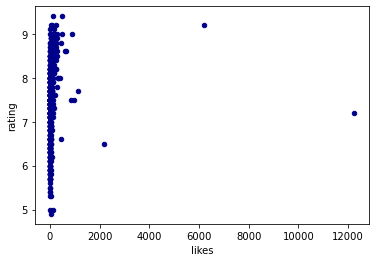

In [33]:
pizza_venues_details.plot.scatter(x='likes',
                      y='rating',
                      c='DarkBlue')

<AxesSubplot:xlabel='price', ylabel='rating'>

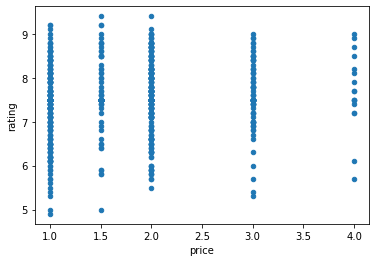

In [34]:
pizza_venues_details.plot.scatter(x='price',
                      y='rating')

In [35]:
price_cat = pizza_venues_details.groupby('price',  as_index=False).mean()


price_cat

,price,likes,rating
0,1.0,13.379845,7.429457
1,1.5,265.851485,7.584158
2,2.0,51.333333,7.587234
3,3.0,56.098765,7.606173
4,4.0,36.823529,7.694118


<AxesSubplot:xlabel='price'>

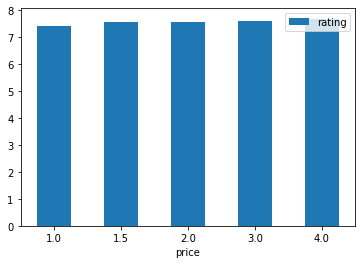

In [36]:
price_cat.plot.bar(x='price', y='rating', rot=0)

<AxesSubplot:xlabel='price'>

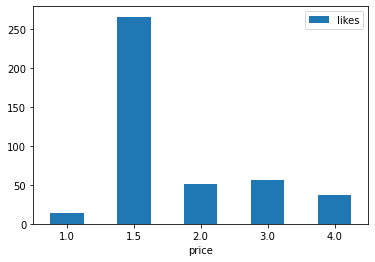

In [37]:
price_cat.plot.bar(x='price', y='likes', rot=0)

In [38]:
pizza_venues_details.describe()

,likes,price,rating
count,868.000000,868.000000,868.000000
mean,59.533410,1.628456,7.520392
std,478.357807,0.713543,0.713722
min,0.000000,1.000000,4.900000
25%,2.000000,1.000000,7.300000
50%,10.000000,1.500000,7.500000
75%,33.000000,2.000000,7.900000
max,12241.000000,4.000000,9.400000


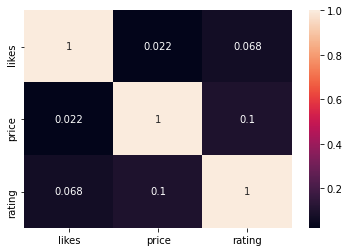

In [39]:
detailsCorr = pizza_venues_details.corr()
sn.heatmap(detailsCorr, annot=True)

plt.show()

In [40]:
pizza_ingredients_gb.head()

Pizza type,Bbq Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,Flat Bread Pizza,Greek Pizza,Hawaiian Pizza,Marinara Pizza,Meat Pizza,Mexican Pizza,...,Pizza Fries,Pizza Slice,Pizza Sub,Pizza Toppings,Sausage Pizza,Seafood Pizza,Steak Pizza,Taco Pizza,Traditional Pizza,Signature Pizza
Restaurant,,,,,,,,,,,,,,,,,,,,,
Enterprise Deli,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Roma Bistro,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Gluten Free Creations,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Romio's Pizza & Pasta - Downtown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Rosa Mexicano,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
pizza_venues_details.rename(columns = {'Name': 'Restaurant'}, inplace = True)

pizza_df_c = pizza_venues_details.merge(pizza_ingredients_gb, on='Restaurant')

pizza_df_c.head()

,Restaurant,id,Venue Name,likes,price,rating,Bbq Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,...,Pizza Fries,Pizza Slice,Pizza Sub,Pizza Toppings,Sausage Pizza,Seafood Pizza,Steak Pizza,Taco Pizza,Traditional Pizza,Signature Pizza
0,'l Bistro,4b4decbbf964a52036db26e3,'L Bistro,11,2.0,5.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24 Hour Express Locksmith Inc,54e7e3d4498e4071f750f7b8,24 Hour Locksmith,0,1.5,7.5,0,0,0,1,...,1,0,0,0,0,0,1,0,1,0
2,7 Day 24 Hours Emergency Locks,539ea214498e9480b696151d,24 Hr 7 Day Totowa Locksmith,0,1.5,7.5,0,1,0,1,...,0,0,0,0,0,1,1,0,0,0
3,Abo's Pizza,4bb9f246935e9521d8862790,Deli Zone/Abo's Pizza,0,1.0,7.5,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Abyssinia Chinese,4b78bd74f964a5203ee02ee3,Abyssinia Cafe,0,2.0,7.5,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [54]:
pizza_df_c = pizza_df_c.drop(['id', 'Venue Name'], axis=1)
#pizza_df_c = pizza_df_c.drop(['id', 'Venue Name', 'price','rating', 'likes'], axis=1)
#pizza_df_c = pizza_venues_details.drop(['id', 'Venue Name'], axis = 1)

pizza_df_c

,Restaurant,likes,price,rating,Bbq Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,Flat Bread Pizza,Greek Pizza,...,Pizza Fries,Pizza Slice,Pizza Sub,Pizza Toppings,Sausage Pizza,Seafood Pizza,Steak Pizza,Taco Pizza,Traditional Pizza,Signature Pizza
0,'l Bistro,11,2.0,5.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24 Hour Express Locksmith Inc,0,1.5,7.5,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
2,7 Day 24 Hours Emergency Locks,0,1.5,7.5,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,Abo's Pizza,0,1.0,7.5,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,Abyssinia Chinese,0,2.0,7.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Zi's Pizza,0,1.0,7.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,Zimorino's Red Pies Over Montana,0,1.0,7.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
861,Zios Italian Kitchen - Olathe,0,1.5,7.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
862,Zoës Kitchen,27,1.0,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
from sklearn.preprocessing import StandardScaler

X = pizza_df_c.values[:,1:]
X = np.nan_to_num(X)
cluster_pizzas = StandardScaler().fit_transform(X)

cluster_pizzas

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.10176386,  0.51812856, -2.26759004, ..., -0.19927667,
        -0.30831321, -0.80551534],
       [-0.12471996, -0.18243964, -0.02722664, ..., -0.19927667,
         3.24345495, -0.80551534],
       [-0.12471996, -0.18243964, -0.02722664, ..., -0.19927667,
        -0.30831321, -0.80551534],
       ...,
       [-0.12471996, -0.18243964, -0.02722664, ..., -0.19927667,
        -0.30831321, -0.80551534],
       [-0.06837316, -0.88300784,  0.67288692, ..., -0.19927667,
        -0.30831321,  1.24144129],
       [-0.03498246,  0.51812856,  2.07311405, ..., -0.19927667,
        -0.30831321,  1.24144129]])

In [56]:
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_pizzas)
labels = k_means.labels_

print(labels)

[1 4 2 0 1 1 1 2 1 1 1 1 2 4 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 1 1 3 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 1 0 1 1 1 1 1 1 1 3
 1 1 1 1 1 1 1 2 1 1 1 1 1 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 1 1 1 1 1 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 3 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 3 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1
 1 1 3 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 0 1 2 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 2 0 1 1 1 1 1 1 1 0 1 2 2 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 2 1 0 1 2 1 1 1 1 1 3 1 2 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1
 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 3 1 1 1 1 4 2 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 1 1 2 1 2 1 1 4 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 1 1 0 1 2 1 1 1 1 2 1 1 4 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 4 1 1 2 1 1 1 

In [57]:
clustered_pizza = pizza_df_c

clustered_pizza["Labels"] = labels

clustered_pizza

,Restaurant,likes,price,rating,Bbq Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,Flat Bread Pizza,Greek Pizza,...,Pizza Slice,Pizza Sub,Pizza Toppings,Sausage Pizza,Seafood Pizza,Steak Pizza,Taco Pizza,Traditional Pizza,Signature Pizza,Labels
0,'l Bistro,11,2.0,5.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,24 Hour Express Locksmith Inc,0,1.5,7.5,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,4
2,7 Day 24 Hours Emergency Locks,0,1.5,7.5,0,1,0,1,0,0,...,0,0,0,0,1,1,0,0,0,2
3,Abo's Pizza,0,1.0,7.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Abyssinia Chinese,0,2.0,7.5,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Zi's Pizza,0,1.0,7.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
860,Zimorino's Red Pies Over Montana,0,1.0,7.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
861,Zios Italian Kitchen - Olathe,0,1.5,7.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
862,Zoës Kitchen,27,1.0,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [58]:
pizza_cluster_labels = clustered_pizza.groupby('Labels', as_index = False).mean()
pizza_cluster_labels

,Labels,likes,price,rating,Bbq Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,Flat Bread Pizza,Greek Pizza,...,Pizza Fries,Pizza Slice,Pizza Sub,Pizza Toppings,Sausage Pizza,Seafood Pizza,Steak Pizza,Taco Pizza,Traditional Pizza,Signature Pizza
0,0,18.414634,1.402439,7.492683,0.073171,0.121951,0.024390,0.024390,0.000000,0.073171,...,0.0,1.000000,0.048780,0.121951,0.000000,0.000000,0.073171,0.097561,0.195122,0.000000
1,1,67.764457,1.672073,7.536812,0.025388,0.022567,0.049365,0.050776,0.038082,0.025388,...,0.0,0.000000,0.031030,0.036671,0.000000,0.029619,0.052186,0.023977,0.078984,0.479549
2,2,20.476190,1.396825,7.384127,0.555556,0.412698,0.031746,0.158730,0.000000,0.174603,...,0.0,0.000000,0.015873,0.063492,0.015873,0.190476,0.285714,0.158730,0.126984,0.000000
3,3,60.571429,1.976190,7.661905,0.095238,0.047619,0.095238,0.000000,0.000000,0.000000,...,0.0,0.047619,0.000000,0.000000,1.000000,0.095238,0.095238,0.000000,0.000000,0.000000
4,4,9.100000,1.200000,7.330000,0.133333,0.233333,0.000000,0.533333,0.000000,0.100000,...,1.0,0.133333,0.166667,0.033333,0.000000,0.133333,0.533333,0.066667,0.100000,0.000000


In [59]:
clustered_pizza['Labels'].value_counts()

1    709
2     63
0     41
4     30
3     21
Name: Labels, dtype: int64

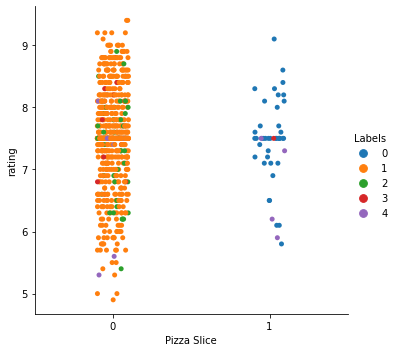

In [70]:
import seaborn as sns

sns.catplot(x="Pizza Slice", y="rating", hue="Labels", data=clustered_pizza)


In [71]:
clustered_pizza_wo_sig = pizza_df_c.drop(['Signature Pizza', 'Pizza Slice'], axis=1)

X = clustered_pizza_wo_sig.values[:,1:]
X = np.nan_to_num(X)
cluster_pizzas = StandardScaler().fit_transform(X)

cluster_pizzas

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.10176386,  0.51812856, -2.26759004, ..., -0.19927667,
        -0.30831321, -0.2524943 ],
       [-0.12471996, -0.18243964, -0.02722664, ..., -0.19927667,
         3.24345495,  3.99727996],
       [-0.12471996, -0.18243964, -0.02722664, ..., -0.19927667,
        -0.30831321,  1.16409712],
       ...,
       [-0.12471996, -0.18243964, -0.02722664, ..., -0.19927667,
        -0.30831321, -0.2524943 ],
       [-0.06837316, -0.88300784,  0.67288692, ..., -0.19927667,
        -0.30831321, -0.2524943 ],
       [-0.03498246,  0.51812856,  2.07311405, ..., -0.19927667,
        -0.30831321, -0.2524943 ]])

In [72]:
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_pizzas)
labels = k_means.labels_

print(labels)

[4 3 1 4 4 4 4 1 4 4 4 4 1 3 2 4 4 4 1 4 4 2 2 4 4 4 4 2 2 4 2 4 1 2 4 4 4
 2 4 2 4 4 4 4 4 4 1 2 2 4 2 4 4 4 4 4 2 4 2 4 4 4 1 2 4 2 4 2 2 4 0 4 4 2
 4 4 4 4 4 4 2 1 2 4 2 4 4 2 2 2 2 2 4 4 4 4 4 4 4 4 2 4 4 1 4 2 4 4 4 4 2
 2 4 2 4 2 0 4 3 2 2 4 2 4 2 2 4 4 4 4 2 2 4 4 3 4 3 4 4 2 4 4 4 4 4 4 2 4
 2 4 4 4 4 2 4 2 4 2 2 1 4 4 4 4 2 4 4 0 2 2 4 4 1 2 4 4 0 4 4 4 4 4 2 2 4
 2 4 2 4 4 4 4 4 0 4 2 0 4 2 4 4 4 2 2 0 1 2 4 2 4 4 2 4 4 4 4 4 2 4 4 1 0
 4 2 2 4 4 4 4 4 1 4 4 4 4 4 4 4 4 4 2 4 2 4 2 4 4 4 4 4 4 4 2 2 3 4 4 1 4
 4 2 4 4 4 4 2 4 4 4 2 0 4 1 4 4 4 4 2 4 2 4 4 4 1 1 2 4 4 4 0 4 4 4 4 4 4
 2 4 2 4 1 4 4 4 2 4 4 4 2 4 4 2 4 4 2 2 2 2 4 2 4 4 4 4 2 4 4 2 4 1 4 1 4
 1 4 4 4 1 4 4 4 4 4 2 4 1 4 4 4 4 4 4 4 2 4 2 4 4 4 4 4 4 4 4 4 4 4 0 4 4
 2 1 4 2 4 4 4 4 4 4 1 2 4 2 2 1 4 4 4 4 3 1 4 0 4 4 2 4 4 4 3 4 2 2 4 2 4
 2 4 4 4 4 4 4 4 2 4 1 4 1 4 4 3 2 4 4 2 2 2 4 4 2 4 2 3 0 0 0 0 0 4 4 4 4
 4 4 2 1 1 1 4 4 4 4 1 4 2 4 4 1 4 4 3 4 2 4 2 4 4 4 4 4 4 2 0 4 4 4 4 2 2
 2 4 2 2 4 3 2 4 1 2 2 2 

In [73]:
clustered_pizza_wo_sig["Labels"] = labels

clustered_pizza_wo_sig

,Restaurant,likes,price,rating,Bbq Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,Flat Bread Pizza,Greek Pizza,...,Pizza Bread,Pizza Fries,Pizza Sub,Pizza Toppings,Sausage Pizza,Seafood Pizza,Steak Pizza,Taco Pizza,Traditional Pizza,Labels
0,'l Bistro,11,2.0,5.9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,24 Hour Express Locksmith Inc,0,1.5,7.5,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,3
2,7 Day 24 Hours Emergency Locks,0,1.5,7.5,0,1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,1
3,Abo's Pizza,0,1.0,7.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
4,Abyssinia Chinese,0,2.0,7.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Zi's Pizza,0,1.0,7.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
860,Zimorino's Red Pies Over Montana,0,1.0,7.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
861,Zios Italian Kitchen - Olathe,0,1.5,7.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
862,Zoës Kitchen,27,1.0,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [74]:
pizza_cluster_labels_wo_sig = clustered_pizza_wo_sig.groupby('Labels', as_index = False).mean()
pizza_cluster_labels_wo_sig

,Labels,likes,price,rating,Bbq Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,Flat Bread Pizza,Greek Pizza,...,Pepperoni Pizza,Pizza Bread,Pizza Fries,Pizza Sub,Pizza Toppings,Sausage Pizza,Seafood Pizza,Steak Pizza,Taco Pizza,Traditional Pizza
0,0,109.518519,2.000000,7.737037,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,20.681159,1.384058,7.384058,0.536232,0.391304,0.028986,0.144928,0.0,0.159420,...,0.188406,0.028986,0.0,0.014493,0.057971,0.115942,0.202899,0.275362,0.144928,0.115942
2,2,155.322870,2.383408,7.960090,0.013453,0.008969,0.161435,0.026906,0.0,0.013453,...,0.071749,0.008969,0.0,0.004484,0.067265,0.062780,0.022422,0.058296,0.000000,0.035874
3,3,9.100000,1.200000,7.330000,0.133333,0.233333,0.000000,0.533333,0.0,0.100000,...,0.133333,0.000000,1.0,0.166667,0.033333,0.000000,0.133333,0.533333,0.066667,0.100000
4,4,23.963107,1.342718,7.346408,0.034951,0.036893,0.003883,0.060194,0.0,0.034951,...,0.056311,0.034951,0.0,0.044660,0.031068,0.000000,0.031068,0.054369,0.040777,0.108738


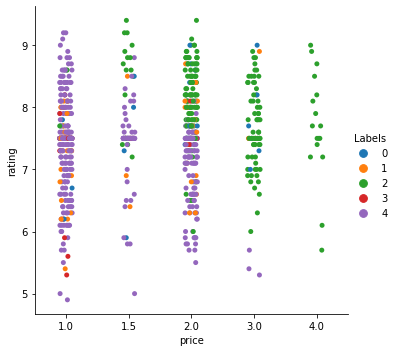

In [77]:
sns.catplot(x="price", y="rating", hue="Labels", data=clustered_pizza_wo_sig)

In [78]:
clustered_pizza_wo_ingredients = pizza_df_c[['Restaurant','likes','price','rating']]

X = clustered_pizza_wo_ingredients.values[:,1:]
X = np.nan_to_num(X)
cluster_pizzas = StandardScaler().fit_transform(X)

cluster_pizzas

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.10176386,  0.51812856, -2.26759004],
       [-0.12471996, -0.18243964, -0.02722664],
       [-0.12471996, -0.18243964, -0.02722664],
       ...,
       [-0.12471996, -0.18243964, -0.02722664],
       [-0.06837316, -0.88300784,  0.67288692],
       [-0.03498246,  0.51812856,  2.07311405]])

In [79]:
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_pizzas)
labels = k_means.labels_

print(labels)

[4 0 0 0 1 1 4 0 4 4 4 0 0 4 1 1 0 0 4 0 0 4 1 0 0 0 4 2 2 0 1 4 1 0 0 0 0
 2 0 2 1 0 1 1 0 0 0 2 1 4 0 0 1 1 0 0 2 1 1 0 0 0 4 1 0 0 0 2 1 0 1 0 0 2
 0 0 0 0 0 1 1 0 1 4 4 4 0 1 1 1 1 1 4 0 0 0 1 1 4 1 2 4 0 0 1 1 4 0 0 4 2
 2 0 1 0 1 0 4 0 1 1 1 2 4 2 1 1 0 0 0 1 1 4 0 0 0 2 1 0 2 4 4 0 0 0 0 1 1
 1 0 0 0 4 2 1 2 4 1 1 4 0 0 0 1 2 4 0 1 2 4 0 0 0 2 0 0 2 1 1 0 0 4 1 0 0
 0 0 2 0 4 0 1 4 1 4 4 2 0 1 0 0 4 2 2 1 0 3 0 2 4 0 2 0 4 0 0 0 1 0 1 4 1
 4 1 1 4 1 1 0 1 0 4 0 4 0 0 0 0 0 0 1 0 1 4 1 0 0 1 0 1 0 0 2 2 0 0 0 0 0
 0 1 4 0 0 1 2 1 4 1 1 2 4 0 0 0 0 1 1 4 4 4 4 4 0 4 2 0 0 1 0 0 1 0 0 1 0
 2 4 1 1 4 0 0 0 1 1 0 0 2 0 1 1 1 0 2 1 1 3 0 2 4 0 0 4 1 0 0 2 0 0 0 1 1
 2 4 1 0 1 0 0 4 0 0 0 0 4 0 0 0 0 4 0 0 1 1 0 0 0 0 0 1 0 1 1 0 4 4 1 0 0
 2 0 1 2 0 4 0 4 1 4 0 2 0 1 2 1 0 1 1 1 0 0 0 2 0 0 1 0 1 4 0 4 2 1 0 1 0
 1 4 4 0 0 4 0 0 2 0 1 0 0 0 1 0 1 0 0 0 1 2 1 1 2 0 1 0 1 1 1 1 1 0 0 4 1
 0 0 1 4 0 4 0 0 0 0 1 0 1 1 0 0 4 4 4 1 1 1 1 0 1 0 1 0 1 2 4 0 1 0 0 1 1
 1 0 1 2 0 0 1 0 0 1 1 0 

In [80]:
clustered_pizza_wo_ingredients['Labels'] = labels

clustered_pizza_wo_ingredients

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Restaurant,likes,price,rating,Labels
0,'l Bistro,11,2.0,5.9,4
1,24 Hour Express Locksmith Inc,0,1.5,7.5,0
2,7 Day 24 Hours Emergency Locks,0,1.5,7.5,0
3,Abo's Pizza,0,1.0,7.5,0
4,Abyssinia Chinese,0,2.0,7.5,1
...,...,...,...,...,...
859,Zi's Pizza,0,1.0,7.5,0
860,Zimorino's Red Pies Over Montana,0,1.0,7.5,0
861,Zios Italian Kitchen - Olathe,0,1.5,7.5,0
862,Zoës Kitchen,27,1.0,8.0,0


In [81]:
pizza_cluster_labels_wo_ing = clustered_pizza_wo_ingredients.groupby('Labels', as_index = False).mean()
pizza_cluster_labels_wo_ing

,Labels,likes,price,rating
0,0,12.889175,1.079897,7.603351
1,1,72.685039,1.944882,7.932677
2,2,54.425532,3.180851,7.707447
3,3,9228.500000,1.500000,8.200000
4,4,36.500000,1.535714,6.276984


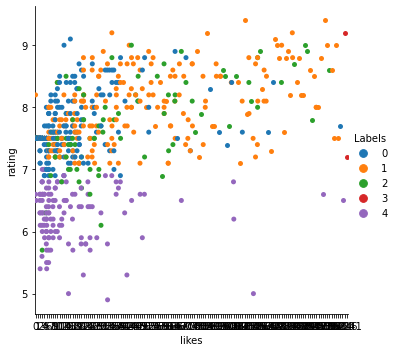

In [82]:
sns.catplot(x="likes", y="rating", hue="Labels", data=clustered_pizza_wo_ingredients)

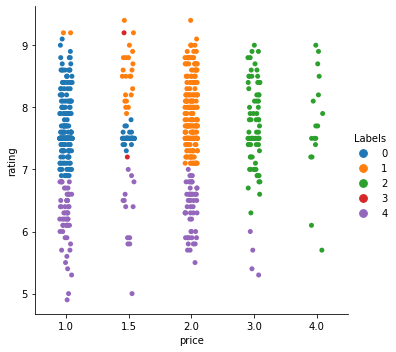

In [83]:
sns.catplot(x="price", y="rating", hue="Labels", data=clustered_pizza_wo_ingredients)

In [88]:
clustered_pizza_wo_det = pizza_df_c.drop(['likes','rating','price', 'Signature Pizza', 'Pizza Slice'], axis=1)

X = clustered_pizza_wo_det.values[:,1:]
X = np.nan_to_num(X)
cluster_pizzas = StandardScaler().fit_transform(X)

cluster_pizzas

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.27804088, -0.26073965, -0.22032632, ..., -0.19927667,
        -0.30831321, -0.2524943 ],
       [-0.27804088, -0.26073965, -0.22032632, ..., -0.19927667,
         3.24345495,  3.99727996],
       [-0.27804088,  3.83524327, -0.22032632, ..., -0.19927667,
        -0.30831321,  1.16409712],
       ...,
       [-0.27804088, -0.26073965, -0.22032632, ..., -0.19927667,
        -0.30831321, -0.2524943 ],
       [-0.27804088, -0.26073965, -0.22032632, ..., -0.19927667,
        -0.30831321, -0.2524943 ],
       [-0.27804088, -0.26073965, -0.22032632, ..., -0.19927667,
        -0.30831321, -0.2524943 ]])

In [89]:
num_clusters = 5

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_pizzas)
labels = k_means.labels_

print(labels)

[1 4 0 1 1 1 1 0 1 1 1 1 0 4 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 3 3
 1 1 1 1 1 1 1 1 3 0 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 0 1 1 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 1 0 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 2 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 3 3 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 1 1 3 2 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 2 1 1 1 1 4 0 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 4 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 4 1 1 0 1 1 1 

In [90]:
clustered_pizza_wo_det['Labels'] = labels

clustered_pizza_wo_det

,Restaurant,Bbq Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,Flat Bread Pizza,Greek Pizza,Hawaiian Pizza,Marinara Pizza,Meat Pizza,...,Pizza Bread,Pizza Fries,Pizza Sub,Pizza Toppings,Sausage Pizza,Seafood Pizza,Steak Pizza,Taco Pizza,Traditional Pizza,Labels
0,'l Bistro,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,24 Hour Express Locksmith Inc,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,4
2,7 Day 24 Hours Emergency Locks,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,Abo's Pizza,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,Abyssinia Chinese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,Zi's Pizza,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
860,Zimorino's Red Pies Over Montana,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
861,Zios Italian Kitchen - Olathe,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
862,Zoës Kitchen,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [91]:
pizza_cluster_labels_wo_det = clustered_pizza_wo_det.groupby('Labels', as_index = False).mean()
pizza_cluster_labels_wo_det

,Labels,Bbq Pizza,Buffalo Pizza,Build your own Pizza,Burger Pizza,Flat Bread Pizza,Greek Pizza,Hawaiian Pizza,Marinara Pizza,Meat Pizza,...,Pepperoni Pizza,Pizza Bread,Pizza Fries,Pizza Sub,Pizza Toppings,Sausage Pizza,Seafood Pizza,Steak Pizza,Taco Pizza,Traditional Pizza
0,0,0.540984,0.409836,0.032787,0.147541,0.000000,0.180328,0.737705,0.131148,0.524590,...,0.131148,0.0,0.0,0.016393,0.065574,0.016393,0.196721,0.262295,0.147541,0.131148
1,1,0.027397,0.028767,0.049315,0.047945,0.036986,0.027397,0.009589,0.030137,0.019178,...,0.053425,0.0,0.0,0.032877,0.041096,0.000000,0.028767,0.053425,0.026027,0.086301
2,2,0.095238,0.047619,0.095238,0.000000,0.000000,0.000000,0.095238,0.047619,0.190476,...,0.476190,0.0,0.0,0.000000,0.000000,1.000000,0.095238,0.095238,0.000000,0.000000
3,3,0.136364,0.045455,0.000000,0.136364,0.000000,0.045455,0.000000,0.045455,0.045455,...,0.045455,1.0,0.0,0.000000,0.045455,0.000000,0.000000,0.136364,0.136364,0.045455
4,4,0.133333,0.233333,0.000000,0.533333,0.000000,0.100000,0.166667,0.100000,0.166667,...,0.133333,0.0,1.0,0.166667,0.033333,0.000000,0.133333,0.533333,0.066667,0.100000


<AxesSubplot:xlabel='variable'>

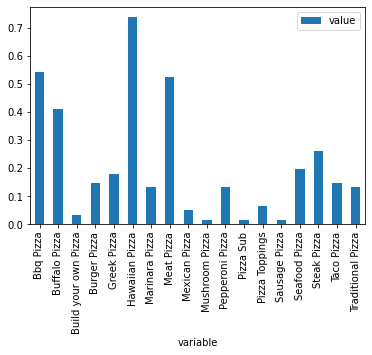

In [94]:
pizza_cluster_labels_wo_det = pizza_cluster_labels_wo_det.drop(['Labels'], axis=1)

ing_cluster_one = pizza_cluster_labels_wo_det[0:1].melt()

ing_cluster_one.drop(ing_cluster_one[ing_cluster_one.value == 0].index, inplace=True)

ing_cluster_one.plot.bar(x='variable', y='value')

<AxesSubplot:xlabel='variable'>

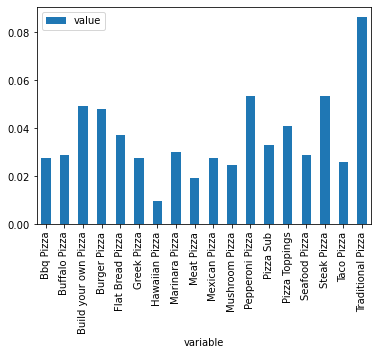

In [95]:
ing_cluster_two = pizza_cluster_labels_wo_det[1:2].melt()

ing_cluster_two.drop(ing_cluster_two[ing_cluster_two.value == 0].index, inplace=True)

ing_cluster_two.plot.bar(x='variable', y='value')

<AxesSubplot:xlabel='variable'>

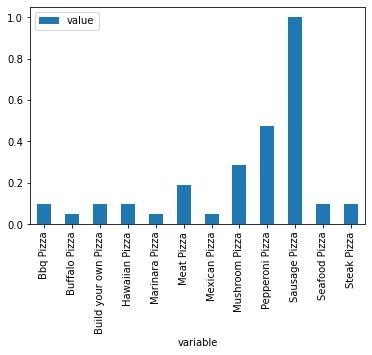

In [96]:
ing_cluster_three = pizza_cluster_labels_wo_det[2:3].melt()

ing_cluster_three.drop(ing_cluster_three[ing_cluster_three.value == 0].index, inplace=True)

ing_cluster_three.plot.bar(x='variable', y='value')

<AxesSubplot:xlabel='variable'>

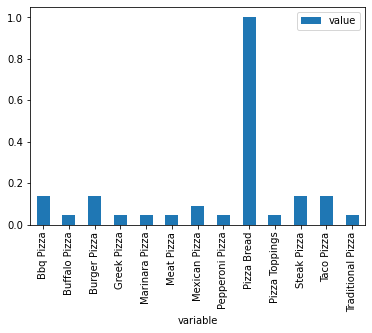

In [97]:
ing_cluster_four = pizza_cluster_labels_wo_det[3:4].melt()

ing_cluster_four.drop(ing_cluster_four[ing_cluster_four.value == 0].index, inplace=True)

ing_cluster_four.plot.bar(x='variable', y='value')

<AxesSubplot:xlabel='variable'>

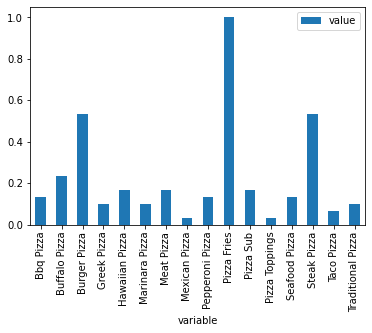

In [98]:
ing_cluster_five = pizza_cluster_labels_wo_det[4:5].melt()

ing_cluster_five.drop(ing_cluster_five[ing_cluster_five.value == 0].index, inplace=True)

ing_cluster_five.plot.bar(x='variable', y='value')

In [ ]:
pizza_cluster_labels_wo_det[4:5]